# Milestone 3 Assignment - Capstone Project

## Author - Trupti Gandhi


New York is one of the busiest cities in the world. According to Census data gathered between 2005 and 2009 54% of NYC people do not have their own car, Along with subways and buses, taxies are most popular transport. There is huge amount of data available to study the taxi trips and its travel duration and tip amount given. Studying the NYC taxi trips and fares can help predict people’s trip durations. Taxi driver companies are facing lot of issues in estimating the time required for each trip based on different circumstances like weather, time of travel and pick up and drop off locations etc. 
Hence it is very essential to study and do analysis considering various factors. There are many instances where no tips are given to driver or the cases where excessive tips are given. This analysis will recommend if we need to provide tip or not, what range of tips should we provide. That’s why we found study and data analysis of the New York City Taxi driver is an important and interesting problem.
Future : This analysis will also help to create a generic model to apply on different cities of the united states.


#### Problem definition: Why you think this is an important/interesting problem


To Tip or Not to Tip, That is the Question!


Almost half a million taxi trips are made daily in the city that **never sleeps**, producing a plethora of information that can prove useful for both the passengers and drivers. We choose to understand what features (besides the quality of the driver) actually factors into the tip received by a cab driver.

Future Growth: 

This Toy model will help us to build the tip recommandation system in big cities like Seattle, Chicago.

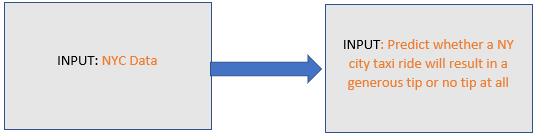

We use a joining dataset detailing all information including date, time, and location of pickup and drop-off, trip distance, payment type, tip amount, total amount.Also hourly  weather information is incorporated in the big taxi dataset.


we would like to study the data, focusing on New Yorkers' tipping habits.The tipping behavior reflects customer satisfaction/dissatisfaction with their rides.


Task: 
- 1 Build a model that will predict where a trip is more likely to result in either no tip or a “generous” tip for the driver.
- 2 What factor drives the typical passengers to pay higher tips or lower tips?
- 3 Predict the amount of tip paid for trip
- 4 Predict whether or not a tip will pay for a trip

## Data Sets


The data used in this study is the information offered by the NYC Taxi and Limousine Commission from the taxi's trips of NYC in 2013. A total amount of 173,179,759 trips in 48.6GB of uncompressed CSV files!



#### Data description: Where you got the data?


There are roughly 200 million taxi rides in New York City each year. Exploiting an understanding of taxi supply and demand could increase the efficiency of the city’s taxi system. In the New York city, people use taxi in a frequency much higher than any other cities of US. Instead of booking a taxi by phone one day ahead of time, New York taxi drivers pick up passengers on street. The ability to predict taxi ridership could present valuable insights to city planners and taxi dispatchers in answering questions such as how to position cabs where they are most needed, how many taxis to dispatch, and how ridership varies over time. Our project focuses on predicting the number of taxi pickups given a one-hour time window and a location within New York City. The problem is formulated in terms of the following inputs and outputs:



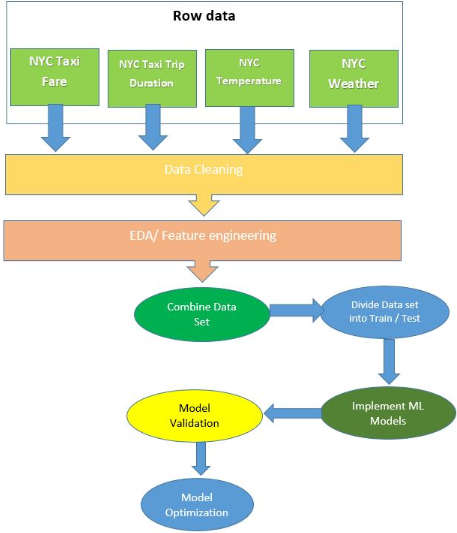


New York taxi data has been the subject of many news reports, and many blogs since it became open a few years ago. The relative large data size also attracts the attention of the big data community using it as a toy example in testing their parallel algorithms. The New York City taxi dataset is a very good example of a large dataset with lots of immediate analytics applications.


- Data Source Name/Title: NYC_Taxi_2013_One_Percent_Fare
- Origin of Data Source : https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/ 
- Data Source Type (e.g., SQL, blob storage, CSV, ARFF, NetCDF, Spreadsheet, etc.): CSV File
- URL (download), cloud storage, data at rest (local storage):  URL 
- The date for the most recent update of the data and the object schema:  2013
- The number of null records and distinct values for columns:  None
- The number of rows and size of the data in the object: There are total 1703987 observations,  11 features in the dataset.

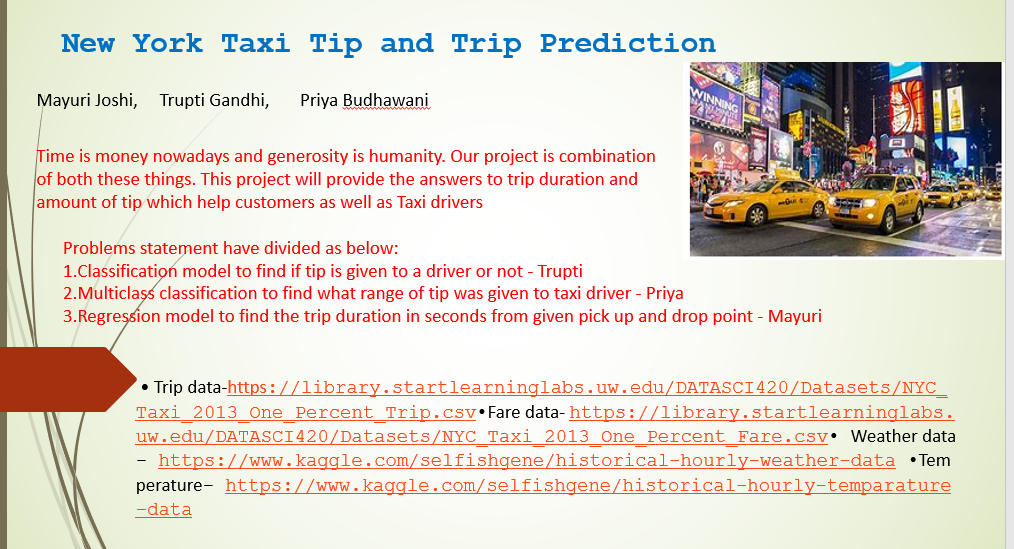

- Trip data-https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/NYC_Taxi_2013_One_Percent_Trip.csv•Fare 
- data- https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/NYC_Taxi_2013_One_Percent_Fare.csv
-  Weather data - https://www.kaggle.com/selfishgene/historical-hourly-weather-data
- Temperature- https://www.kaggle.com/selfishgene/historical-hourly-temparature-data![image.png](attachment:image.png)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages

import os
import sys
import time
import requests
import datetime
import math

In [2]:
#Taking weather data
WeatherData = pd.read_csv(r"C:\Users\Gandhi\Desktop\Machine_learning_techniques\Milestone2\Taxi_Weather.csv")
WeatherData.head()

,Unnamed: 0,datetime,temperature,year,hour,monthnumber,monthname,weatherdescription,weather_type,daytime,Season,hour_total
0,0,1/1/2013 0:00,272.03,2013,0,1,Jan,few clouds,Cloudy,Night,Winter,1
1,1,1/1/2013 1:00,271.46,2013,1,1,Jan,few clouds,Cloudy,Night,Winter,1
2,2,1/1/2013 2:00,271.19,2013,2,1,Jan,few clouds,Cloudy,Night,Winter,1
3,3,1/1/2013 3:00,271.07,2013,3,1,Jan,few clouds,Cloudy,Night,Winter,1
4,4,1/1/2013 4:00,270.83,2013,4,1,Jan,sky is clear,Clear Cloud,Night,Winter,1


In [3]:
# changing the datetime column into datetime64[ns]
WeatherData['datetime']= pd.to_datetime(WeatherData['datetime'])

In [4]:
#Making 3 columns Hours, pickup month, date
WeatherData["hour"] =WeatherData.datetime.dt.hour
WeatherData["pickup_month"] = WeatherData.datetime.dt.month
WeatherData["date"] =WeatherData.datetime.dt.date

In [5]:
#Taking trip Data
Tripdata = pd.read_csv(r"C:\Users\Gandhi\Desktop\Machine_learning_techniques\Milestone2\NYC_Taxi_2013_One_Percent_Trip.csv", header=0)
Tripdata.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,N,3/8/2013 9:55:27 PM,3/8/2013 10:05:59 PM,2,631,2.5,-73.959610,40.715942,-73.963417,40.692169
1,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,N,3/9/2013 6:51:52 PM,3/9/2013 7:02:59 PM,2,666,1.8,-73.973373,40.763958,-73.977303,40.782139
2,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,N,3/9/2013 7:04:35 PM,3/9/2013 7:27:57 PM,2,1401,4.4,-73.977837,40.782818,-74.000893,40.737076
3,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,N,3/9/2013 8:33:06 PM,3/9/2013 8:45:38 PM,1,751,2.8,-73.980331,40.784382,-73.984291,40.748688
4,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,N,3/9/2013 11:10:38 PM,3/9/2013 11:14:59 PM,1,261,1.5,-73.986687,40.749474,-73.990677,40.762524


In [6]:
#New_York_fare = pd.read_csv(r"https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/New%20York%20Taxi%202013/NYC_Taxi_2013_One_Percent_Fare.csv")
New_York_fare = pd.read_csv(r"C:\Users\Gandhi\Desktop\Machine_learning_techniques\Milestone1\NYC_Taxi_2013_One_Percent_Fare.csv", header=0)
New_York_fare.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tolls_amount,total_amount,tip_amount
0,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/8/2013 9:55:27 PM,CSH,10.5,0.5,0.5,0.0,11.5,0.0
1,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 6:51:52 PM,CRD,9.5,0.0,0.5,0.0,12.0,2.0
2,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 7:04:35 PM,CSH,18.0,0.0,0.5,0.0,18.5,0.0
3,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 8:33:06 PM,CSH,11.5,0.5,0.5,0.0,12.5,0.0
4,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 11:10:38 PM,CRD,6.0,0.5,0.5,0.0,8.4,1.4


In [7]:
# Replacing NAN values with N
Tripdata.fillna('N  ', inplace=True)

In [8]:
Tripdata['store_and_fwd_flag'].unique()

array(['N  ', 'Y  '], dtype=object)

In [9]:
# Merging of Trip and Tip datasets
TripandFareMerge = pd.merge(Tripdata,New_York_fare)
TripandFareMerge.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tolls_amount,total_amount,tip_amount
0,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,N,3/8/2013 9:55:27 PM,3/8/2013 10:05:59 PM,2,631,2.5,...,40.715942,-73.963417,40.692169,CSH,10.5,0.5,0.5,0.0,11.5,0.0
1,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,N,3/9/2013 6:51:52 PM,3/9/2013 7:02:59 PM,2,666,1.8,...,40.763958,-73.977303,40.782139,CRD,9.5,0.0,0.5,0.0,12.0,2.0
2,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,N,3/9/2013 7:04:35 PM,3/9/2013 7:27:57 PM,2,1401,4.4,...,40.782818,-74.000893,40.737076,CSH,18.0,0.0,0.5,0.0,18.5,0.0
3,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,N,3/9/2013 8:33:06 PM,3/9/2013 8:45:38 PM,1,751,2.8,...,40.784382,-73.984291,40.748688,CSH,11.5,0.5,0.5,0.0,12.5,0.0
4,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,N,3/9/2013 11:10:38 PM,3/9/2013 11:14:59 PM,1,261,1.5,...,40.749474,-73.990677,40.762524,CRD,6.0,0.5,0.5,0.0,8.4,1.4


In [10]:
# changing the datetime column into datetime64[ns]
TripandFareMerge['pickup_datetime']= pd.to_datetime(TripandFareMerge['pickup_datetime'])

In [11]:
TripandFareMerge["pickup_dayofweek"] = TripandFareMerge.pickup_datetime.dt.dayofweek
TripandFareMerge["pickup_weekday_name"] = TripandFareMerge.pickup_datetime.dt.weekday_name
TripandFareMerge["hour"] = TripandFareMerge.pickup_datetime.dt.hour
TripandFareMerge["pickup_month"] = TripandFareMerge.pickup_datetime.dt.month
TripandFareMerge["date"] = TripandFareMerge.pickup_datetime.dt.date

In [12]:
# Merging Trip and Fare with Weather data
df = pd.merge(TripandFareMerge, WeatherData,  how='left', sort=True, on=['date','hour']) 
df.head().transpose()

,0,1,2,3,4
medallion,00E67F2CAC914F384C9803F02C7F85D9,00E67F2CAC914F384C9803F02C7F85D9,00E67F2CAC914F384C9803F02C7F85D9,059E5BF1D421092E005D3A74304CEED3,059E5BF1D421092E005D3A74304CEED3
hack_license,D33D2B6EB5B863CF167D251FEADFF165,D33D2B6EB5B863CF167D251FEADFF165,D33D2B6EB5B863CF167D251FEADFF165,D8AA5AEE5F1CBB3897197CAA992902F4,D8AA5AEE5F1CBB3897197CAA992902F4
vendor_id,VTS,VTS,VTS,VTS,VTS
rate_code,1,1,1,1,1
store_and_fwd_flag,N,N,N,N,N
pickup_datetime,2013-01-01 00:20:00,2013-01-01 00:34:00,2013-01-01 00:51:00,2013-01-01 00:34:00,2013-01-01 00:19:00
dropoff_datetime,1/1/2013 12:30:00 AM,1/1/2013 12:48:00 AM,1/1/2013 1:03:00 AM,1/1/2013 12:40:00 AM,1/1/2013 12:34:00 AM
passenger_count,4,5,4,1,1
trip_time_in_secs,600,840,720,360,900
trip_distance,2.47,4.71,2.18,0.25,1.36


In [13]:
df.isnull().sum()

medallion              0
hack_license           0
vendor_id              0
rate_code              0
store_and_fwd_flag     0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
trip_time_in_secs      0
trip_distance          0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
payment_type           0
fare_amount            0
surcharge              0
mta_tax                0
tolls_amount           0
total_amount           0
tip_amount             0
pickup_dayofweek       0
pickup_weekday_name    0
hour                   0
pickup_month_x         0
date                   0
Unnamed: 0             0
datetime               0
temperature            0
year                   0
monthnumber            0
monthname              0
weatherdescription     0
weather_type           0
daytime                0
Season                 0
hour_total             0
pickup_month_y         0
dtype: int64

Removing duplicate columns + removing columns which does not show much effect on tips. We have done most of the calculation in Milestone 1 and Milestone 2. Showing one example below.

In [14]:
def count_mean(data):
    import numpy as np
    import pandas as pd
    groups = data.groupby('weather_type') # Create the groups
    ## Create a data frame with the counts and the means of the groups
    return pd.DataFrame({'count': groups.size(), 
                        'mean': groups.aggregate(np.mean).loc[:, 'tip_amount']})
   
count_mean(df)

,count,mean
weather_type,,
Clear Cloud,575755,1.383962
Cloudy,692215,1.338723
Fog,38835,1.377378
Rainy,377101,1.371253
Snowy,20159,1.297398


"Tip amount" mean is almost same for all **weather types**.I am going to remove this column.

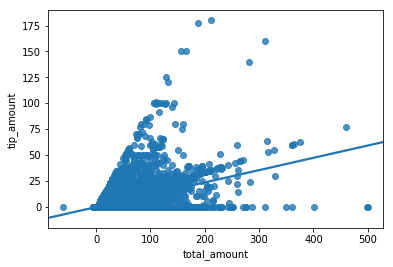

In [15]:
# library & dataset
import seaborn as sns

# use the function regplot to make a scatterplot
sns.regplot(x=df['total_amount'], y=df['tip_amount'])

Tip amount is linerly proportional to the total amount. Total amount is sum of all amounts. ('fare_amount', 'surcharge', 'mta_tax',  'tolls_amount', 'tip_amount'). we can keep one column total amount or can keep all other columns.I am going to keep all other columns and **remove total amount** column. 

In [32]:
# converting price value into log 
df['log_Tip']= np.log(df['tip_amount'])

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [33]:
import numpy.random as nr
nr.seed(1357)
norm1 = df['tip_amount']
norm2 = df['log_Tip']

I will run a statistical analysis that assumes our dependent variable is **Normally distributed**, we can use a Normal Q-Q plot to check that assumption. It’s just a visual check, not an air-tight proof, so it is somewhat subjective. But it allows us to see at-a-glance if our assumption is plausible, and if not, how the assumption is violated and what data points contribute to the violation

C:\Users\Gandhi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3087: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\Gandhi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Gandhi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Gandhi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


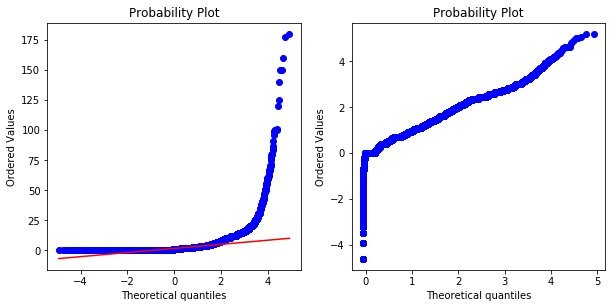

In [34]:
# Checking the distribution using Q-Q plot
def qq_plot(vec1, vec2):
    import matplotlib.pyplot as plt
    import scipy.stats as ss
    plt.figure(figsize=(10, 10)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1) ## Plot the right subplot
qq_plot(norm1, norm2) 

- The curved pattern in fig. 1 st suggests that the tip value are not normally distributed.

- The curved pattern in fig. 2 nd suggests that the log tip value is also not closed to normally distribution but much better tha fig 1, on top side it is a exact straight line.(After 0)



I have created 2 variables.

With_tip: This is to identify transactions with tips or not. This variable was created after discovering that 60% of transactions have 0 tip. Tip_percentage: This is percentage of tip on total amount

In [16]:
#Calculating the tip percentage
#Converting the tip into binary
"""
    Tip_percentage: float, target variable
     With_tip: int {0,1}, 1 = transaction with tip, 0 transction without tip
"""
def engineer_features(row):
    df= row.copy()
    
   # create tip percentage variable
    df['Tip_percentage'] = 100*df.tip_amount/df.total_amount
    
    # create with_tip variable
    df['With_tip'] = (df.Tip_percentage>0)*1

    return df

In [17]:
df= engineer_features(df)

In [18]:
#Doing t - test on hours to see if we can remove this column

def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index) 


In [19]:
No_Tip_Time =df.loc[df.loc[:,'With_tip'] == 0, 'hour']
Yes_Tip_Time = df.loc[df.loc[:,'With_tip'] == 1,'hour']


len(No_Tip_Time), len(Yes_Tip_Time)

(811364, 892701)

In [20]:
Tip_Data = t_test(No_Tip_Time ,Yes_Tip_Time , alpha = 0.05)
print(Tip_Data)

DegFreedom    1.696900e+06
Difference   -9.187899e-02
Statistic    -9.192328e+00
PValue        3.848404e-20
Low95CI      -1.114406e-01
High95CI     -7.231737e-02
dtype: float64


A p-value is the probability of rejecting a null-hypothesis when the hypothesis is proven true. 
we also know, If the p-value is equal to or less than the significance level (α), then the null hypothesis is inconsistent and it needs to be rejected.

 - HO = Hours can have effect on tip given by cutomer
 - H1 = Hours should not have effect on tip given by cutomer
 
 We can reject the null hypothesis in this case and remove the hours column.

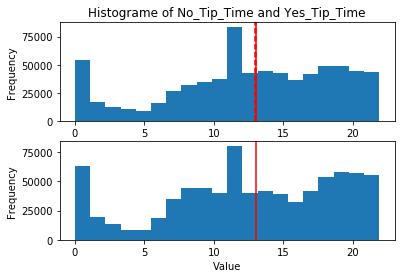

In [21]:
%matplotlib inline
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
def plot_t(a, b, t_test, cols=['No_Tip_Time' , 'Yes_Tip_Time'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
plot_t(No_Tip_Time , Yes_Tip_Time, Tip_Data )

Examine these statistics noticing the following:
- Difference in means is neglegible.
- t-statistic is large and the p-value is small too.
- Based at the above statistics we can reject the null hypothesis. 
- Notice that the mean of the population in the lower plot  and upper plot. This confirms that we reject the null hypothesis that there is significant difference in these means. 
- we have to remove hour feature for next calculations.

In [22]:
df3 = df.drop(['medallion', 'monthnumber','hack_license','pickup_datetime', 'dropoff_datetime','hour','dropoff_longitude','dropoff_latitude','total_amount','Unnamed: 0','monthname','year','datetime','pickup_month_y','pickup_weekday_name','hour_total','date'],1)

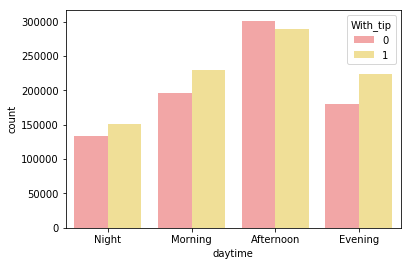

In [23]:
cp = sns.countplot(x="daytime", hue="With_tip", data=df3, 
                   palette={0: "#FF9999", 1: "#FFE888"})

Dattime is important feature in our calculation.It also shows the traffic time in the day time.

Text(0.5,1,'Checking proporsion of tip_amount with mta_tax by vendor_ID ')

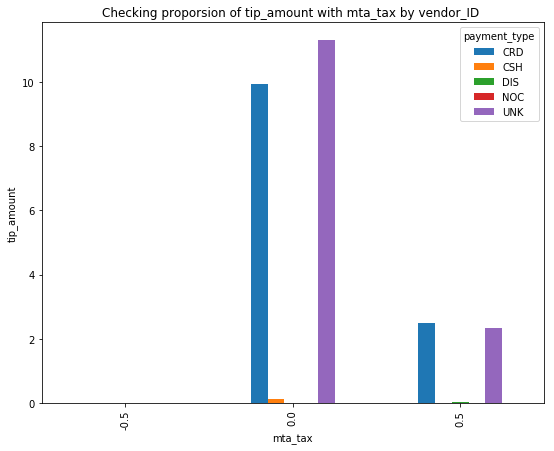

In [24]:
pd.pivot_table(df3, values='tip_amount', columns='payment_type', index='mta_tax').plot.bar(figsize = (9,7))
plt.xlabel('mta_tax')
plt.ylabel('tip_amount')
plt.title('Checking proporsion of tip_amount with mta_tax by vendor_ID ')

Most of the time tip is given by customers who are using unk, CRD.

Text(0.5,1,'Checking proporsion of Tip_Amount with MTA_tax by vendor_ID ')

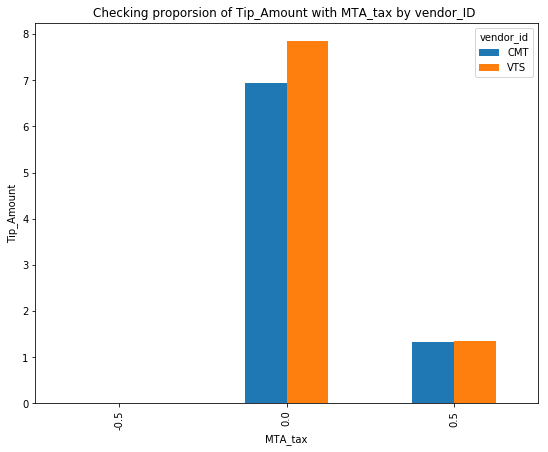

In [25]:
#checking vender id to see the effect on tip.
pd.pivot_table(df3, values='tip_amount', columns='vendor_id', index='mta_tax').plot.bar(figsize = (9,7))
plt.xlabel('MTA_tax')
plt.ylabel('Tip_Amount')
plt.title('Checking proporsion of Tip_Amount with MTA_tax by vendor_ID ')

In [26]:
#for each make, sum the total number of wine in each bin 
Weather_Tip = pd.crosstab(df3.loc[:, 'weatherdescription'], df3.loc[:, 'With_tip'])
Weather_Tip.head()

With_tip,0,1
weatherdescription,,
broken clouds,105049,116525
drizzle,2195,2574
few clouds,67164,71368
fog,11971,13269
freezing rain,18,23


weather description is most important feature. Graph clearly shows differance between tip given and not given by customer at different weather condition. 

In [27]:
df3 = df3.drop(['Tip_percentage','With_tip'],1)

**Tip Amount ** is important feature as this is a target. Let's get some more deatils on this by calculating the minimum, maximum, mean, median, and standard deviation.




##### Calculate some Tip_Amount statistics

In [55]:
# Calculate statistics of tips as this is out target variable
New_York_tip_statistics = df3.tip_amount
Total_tip_amount = df3.shape[0] # size of data

min_price = np.min(New_York_tip_statistics) # minimum price
max_price = np.max(New_York_tip_statistics) # maximum price
mean_price = np.mean(New_York_tip_statistics) # mean price
median_price = np.median(New_York_tip_statistics)# median price
std_price = np.std(New_York_tip_statistics)# standard deviation
    
print ("Total Number:", Total_tip_amount)
print ("Minimum tip: {:,.2f}".format(min_price))
print ("Maximum tip: {:,.2f}".format(max_price))
print ("Mean tip: {:,.2f}".format(mean_price))
print ("Median tip: {:,.2f}".format(median_price))
print ("Standard Deviation: {:,.2f}".format(std_price))

Total Number: 1704065
Minimum tip: 0.00
Maximum tip: 180.00
Mean tip: 1.36
Median tip: 1.00
Standard Deviation: 2.17


In [74]:

df4 = pd.get_dummies(df3, columns= ['store_and_fwd_flag','vendor_id','payment_type','weatherdescription','daytime','Season'], drop_first = True)

In [75]:
df4.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,fare_amount,surcharge,mta_tax,tolls_amount,...,weatherdescription_thunderstorm with heavy rain,weatherdescription_thunderstorm with light rain,weatherdescription_thunderstorm with rain,weatherdescription_very heavy rain,daytime_Evening,daytime_Morning,daytime_Night,Season_Spring,Season_Summer,Season_Winter
count,1.704065e+06,1.704065e+06,1.704065e+06,1.704065e+06,1.704065e+06,1.704065e+06,1.704065e+06,1.704065e+06,1.704065e+06,1.704065e+06,...,1.704065e+06,1.704065e+06,1.704065e+06,1.704065e+06,1.704065e+06,1.704065e+06,1.704065e+06,1.704065e+06,1.704065e+06,1.704065e+06
mean,1.030509e+00,1.713122e+00,8.285453e+02,9.774629e+00,-7.362616e+01,4.039968e+01,1.230490e+01,3.197890e-01,4.984185e-01,2.509747e-01,...,2.711164e-04,5.175859e-04,6.372996e-04,1.004363e-02,2.365033e-01,2.496296e-01,1.670852e-01,2.659717e-01,2.351454e-01,2.434174e-01
std,3.343462e-01,1.380154e+00,1.768463e+04,6.776735e+03,6.340920e+00,6.781561e+00,9.919849e+00,3.619926e-01,2.818020e-02,1.201384e+00,...,1.646339e-02,2.274463e-02,2.523676e-02,9.971340e-02,4.249348e-01,4.327987e-01,3.730520e-01,4.418494e-01,4.240898e-01,4.291450e-01
min,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00,-7.352067e+02,-3.181078e+03,-5.200000e+01,-1.000000e+00,-5.000000e-01,-7.500000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,3.620000e+02,1.050000e+00,-7.399231e+01,4.073593e+01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00,6.000000e+02,1.800000e+00,-7.398206e+01,4.075297e+01,9.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,2.000000e+00,9.600000e+02,3.200000e+00,-7.396786e+01,4.076738e+01,1.400000e+01,5.000000e-01,5.000000e-01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,2.100000e+02,8.000000e+00,4.294935e+06,8.050633e+06,4.099329e+01,7.399406e+01,5.000000e+02,5.500000e+00,5.000000e-01,9.900000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Using describe to obtain a few of statistical values from the numeric attributes.I see negative values in fare_amount, surcharge, mta_tax, tolls_amount, total_amount. These seems to be incorrect data, outliers, we will remove these outliers.

In [87]:
#Removing Negative values for mta_tax
df_mta_amount = df4[df4['mta_tax'] <0 ]
df4 =df4.drop(df_mta_amount.index, axis = 0)

In [36]:
#Removing Negative values for surcharges
df_surcharge_amount = df4[df4['surcharge'] <0 ]
df4 = df4.drop(df_surcharge_amount.index, axis = 0)

In [35]:
# #Removing Negative values for fare amount
df_fare_amount = df4[df4['fare_amount'] <0 ]
df4 = df4.drop(df4.index, axis = 0)

#### Data exploration and analyzing report: anything that you think it is valuable to mention, any insight you get from the data. --

When we think of how a tip is evaluated, we generally assess the person for the quality of their service. This for
the most part is intuitively true, but when we look deeper we find that it is not the only factor in play. In the case of
New York City’s taxi drivers, a large number of factors such as location, trip distance, trip duration and fare have a
significant effect on tip. There are also some temporal effects on tip, such as the time of day and day of week both play a role in determining how much of a tip they receive. It can be said that in more affluent parts of the city and during peak hours, a higher percentage tip will be paid to any taxi driver. Hopefully with this information, taxi drivers can better plan their routines for the day in order to increase their own earnings

In [ ]:
import pandas_profiling
# prints the report to the screen
pandas_profiling.ProfileReport(df4)

In [93]:
#Convert the continuous output value from continuous to binary (0,1) and build an SVC
#smaller than 0 : class: ‘0’ and any tip given (class: ‘1’).
threshold = 0
df4['Tip-noTip'] = df['tip_amount'].gt(threshold).astype(int)
print (df4['Tip-noTip'].loc[0:5])

0    0
1    0
2    0
3    0
4    0
5    0
Name: Tip-noTip, dtype: int32


In [94]:
df4['Tip-noTip'].unique()

array([0, 1], dtype=int64)

In [95]:
# REmoving the tip amount column and adding tip or no_tip colun for classification model.
Tip_Model1 =  df4[['rate_code',
 'passenger_count',
 'trip_time_in_secs',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'fare_amount',
 'surcharge',
 'mta_tax',
 'tolls_amount',
 'pickup_dayofweek',
 'pickup_month_x',
 'temperature',
 'store_and_fwd_flag_Y  ',
 'vendor_id_VTS',
 'payment_type_CSH',
 'payment_type_DIS',
 'payment_type_NOC',
 'payment_type_UNK',
 'weatherdescription_drizzle',
 'weatherdescription_few clouds',
 'weatherdescription_fog',
 'weatherdescription_freezing rain',
 'weatherdescription_haze',
 'weatherdescription_heavy intensity drizzle',
 'weatherdescription_heavy intensity rain',
 'weatherdescription_heavy snow',
 'weatherdescription_light intensity drizzle',
 'weatherdescription_light rain',
 'weatherdescription_light rain and snow',
 'weatherdescription_light snow',
 'weatherdescription_mist',
 'weatherdescription_moderate rain',
 'weatherdescription_overcast clouds',
 'weatherdescription_proximity thunderstorm',
 'weatherdescription_scattered clouds',
 'weatherdescription_sky is clear',
 'weatherdescription_smoke',
 'weatherdescription_snow',
 'weatherdescription_thunderstorm',
 'weatherdescription_thunderstorm with heavy rain',
 'weatherdescription_thunderstorm with light rain',
 'weatherdescription_thunderstorm with rain',
 'weatherdescription_very heavy rain',
 'daytime_Evening',
 'daytime_Morning',
 'daytime_Night',
 'Season_Spring',
 'Season_Summer',
 'Season_Winter',
 'Tip-noTip']]

In [96]:
Tip_Model1.shape

(1704045, 51)

we can take 1% for the next calculation(Model)

In [97]:
sample_data1 = Tip_Model1.sample(n=17040,replace="False")

In [98]:
# Separate Features from Target
X = sample_data1.iloc[:, 0:49]   # load features into X DF
Y = sample_data1.iloc[:, 50]     # Load target into Y DF

In [99]:
print(X.shape)
print(Y.shape)

(17040, 49)
(17040,)


In [100]:
from sklearn.model_selection import train_test_split

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [101]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_test.shape)

(13632, 49)
(13632,)
(3408, 49)
(3408,)
(3408, 49)


Feature scaling is a method used to standardize the range of features, usually between the range from 0 to 1. It is also known as data normalization (or standardization) and is a crucial step in data preprocessing.

In [102]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std_train = sc.fit_transform(X_train)

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score 


#### Feature and model selection


A classification model can serve as an explanatory tool to distinguish between objects of different classes.In order to build the final model, four phases were followed (1) data cleaning, (2) feature engineering (3) exploratory data analysis and (4) model selection

classification model to find out weither a **transaction will pay tip**

1. **KNN**
This is first approach we are going to try.
2. **Linear Regression**
This is second approach we are going to try.
3. **SVC**
This is third approach we are going to try.
4. **Desicion Tree**
This is fourth approach we are going to try. It is reasonable to assume that the tip ratio is dependent of some of its features, like trip distance, time of the day, total amount
5. **Random Forest classification**
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. RFR uses an ensemble of decision tree for regression.They have proved very effective in regression problems previously and are known to overfit less than many models if correctly used. We can set the parameters by grid search.We know that with good regularization and other parameters like max leaf nodes, it outperforms linear regression.


 
  
  

In [132]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [133]:
knn.fit(X_std_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [134]:
y_knn_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_knn_pred))

0.463321596244


This is a big data for KNN model.Let's use function to determine the value of K.

In [135]:
# try K=1 through K=25 and record testing accuracy
k_range = list (range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors =k)
    knn.fit(X_train, y_train )
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_knn_pred))

Text(0,0.5,'Testing Accuracy')

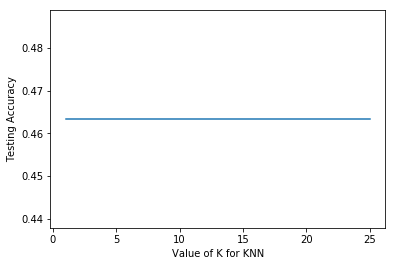

In [136]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [137]:
#Repeat for KNN with K=2:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
print(knn)
knn.fit(X_std_train,y_train)
y_knn_pred_class = knn.predict(X_test)
print(accuracy_score(y_test, y_knn_pred_class))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')
0.549882629108


In [138]:
# compare actual response values (y_test) with predicted response values (y_pred)
AR =accuracy_score(y_test, y_knn_pred_class)
print(AR)

0.549882629108


In [139]:

print(confusion_matrix(y_test, y_knn_pred_class))

CM_log = confusion_matrix(y_test, y_knn_pred_class)

TN, FP, FN, TP = CM_log.ravel()
print(TN, FP, FN, TP )

[[1227  360]
 [1174  647]]
1227 360 1174 647


In [140]:
#Classification Accuracy: Overall, how often is the classifier correct?
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_knn_pred_class))

0.549882629108
0.549882629108


Accuracty score for KNN is 54%.

In [141]:
#Classification Error: Overall, how often is the classifier incorrect?

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - accuracy_score(y_test, y_knn_pred_class))

0.450117370892
0.450117370892


In [142]:
#Sensitivity: When the actual value is positive, how often is the prediction correct?
#How "sensitive" is the classifier to detecting positive instances?
print(TP / float(TP + FN))
print(recall_score(y_test, y_knn_pred_class))

0.355299286107
0.355299286107


In [143]:
#Precision: When a positive value is predicted, how often is the prediction correct?
print(TP / float(TP + FP))
print(precision_score(y_test, y_knn_pred_class))

0.642502482622
0.642502482622


ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

In [144]:
from sklearn.metrics import roc_curve, roc_auc_score
print(roc_auc_score(y_test,y_knn_pred_class))

0.564228092959


In [145]:
#f1_score
print(f1_score(y_test, y_knn_pred_class))

0.45756718529


In [246]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
# train a logistic regression model on the training set
logreg = LogisticRegression()
# fit the model with data --Model is learning the relationship between X and y
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [247]:
#  make predictions on the testing set
y_lin_pred = logreg.predict(X_test)

In [248]:
# compare actual response values (y_test) with predicted response values (y_pred)
AR =accuracy_score(y_test, y_lin_pred)
print(AR)

0.985035211268


In [249]:
# each row of this matrix corresponds to each one of the classes of the dataset
print ("Coefficients:")
print (logreg.coef_)

Coefficients:
[[ -7.11833010e-01  -1.43548645e-02  -1.06466964e-05   2.36374983e-02
   -2.10615909e-01  -2.08887969e-01  -2.74479376e-03  -1.34330937e-01
    3.46077877e-01   9.10418180e-02   2.62044736e-02  -1.38492500e-02
   -1.01261532e-02   1.22924577e-01  -5.42454580e-01  -1.00030190e+01
   -3.51334748e+00  -5.23804800e+00   2.45034443e-01  -1.63504266e-01
   -1.77642303e-01  -5.02532923e-02   0.00000000e+00  -1.50573045e-01
    1.02445942e-02  -7.12596720e-01   1.56700734e-01   1.85635950e-01
    1.53354607e-01   3.21815580e-02  -3.57470201e-01   6.00824668e-01
   -3.71596076e-01  -6.01240799e-02   5.32409167e-02  -1.45308428e-01
    2.02765701e-01   8.84965115e-03   1.38210960e-01  -2.18157713e-01
   -2.53371198e-01  -5.37886562e-03   5.76029284e-02   2.37507927e-01
    3.85920478e-01  -2.86769111e-02  -2.99266490e-01   1.94612882e-01
    1.22242088e-01]]


In [250]:
# each element of this vector corresponds to each one of the classes of the dataset
print ("Intercept:")
print (logreg.intercept_)

Intercept:
[ 0.00289659]


Classification accuracy is the easiest classification metric to understand but it does not tell you what "types" of errors your classifier is making. so we are using the Table that describes the performance of a classification model called as Confusion matrix.

In [251]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(confusion_matrix(y_test, y_lin_pred))

[[1536   51]
 [   0 1821]]


In [252]:
CM_log = confusion_matrix(y_test, y_lin_pred)

TN, FP, FN, TP = CM_log.ravel()
print(TN, FP, FN, TP)

1536 51 0 1821


In [253]:
#Classification Accuracy: Overall, how often is the classifier correct?
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_lin_pred))

0.985035211268
0.985035211268


In [254]:
#Classification Error: Overall, how often is the classifier incorrect?

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - accuracy_score(y_test, y_lin_pred))

0.0149647887324
0.0149647887324


In [255]:
#Sensitivity: When the actual value is positive, how often is the prediction correct?
#How "sensitive" is the classifier to detecting positive instances?
print(TP / float(TP + FN))
print(recall_score(y_test, y_lin_pred))

1.0
1.0


In [256]:
#Precision: When a positive value is predicted, how often is the prediction correct?
print(TP / float(TP + FP))
print(precision_score(y_test, y_lin_pred))

0.972756410256
0.972756410256


In [257]:
#f1_score
print(f1_score(y_test, y_lin_pred))

0.986190089358


In [258]:
# Store the predicted probabilities for class 1
y_lin_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [259]:
print(roc_auc_score(y_test, y_lin_pred_prob))

0.986531147673


Accuracy for linear regression is 98%

Using SVC model

In [151]:
from sklearn import svm
C = 1.0 #0.01
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [153]:
# Cross Validation within Train Dataset
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))


Average Accuracy: 	 0.9844
Accuracy SD: 		 0.0037


In [154]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [155]:
confusion_matrix(y_train, y_train_pred)

array([[6320,  213],
       [   0, 7099]], dtype=int64)

In [156]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9848
Recall Score: 		 0.9844
F1 Score: 		 0.9844


In [158]:
#Cross Validation within Test Dataset

y_test_pred = cross_val_predict(clf, sc.transform(X_test), y_test, cv=3)

In [159]:
confusion_matrix(y_test, y_test_pred)

array([[1536,   51],
       [   0, 1821]], dtype=int64)

In [160]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.9854
Recall Score: 		 0.9850
F1 Score: 		 0.9850


#### Grid Search

In [161]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [162]:
#we can improve this by scaling the features
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))])

In [163]:
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)}

In [164]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy')

In [165]:
svm_grid_rbf.fit(X_std_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed: 53.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20), 'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [166]:
svm_grid_rbf.best_score_

0.94021420187793425

In [167]:
best = svm_grid_rbf.best_estimator_.get_params()

In [168]:
for k in sorted(params.keys()): 
    print('\t{0}: \t {1:.2f}'.format(k, best[k]))


	clf__C: 	 20.00
	clf__gamma: 	 0.00


In [169]:
#Conducting validation in the test dataset
y_test_pred = svm_grid_rbf.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[1483,  104],
       [  64, 1757]], dtype=int64)

In [170]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                       y_test_pred, 
                                                       average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                               y_test_pred, 
                                               average='weighted')))

Precision Score: 	 0.9509
Recall Score: 		 0.9507
F1 Score: 		 0.9507


#### Types of Decision Trees
Types of decision tree is based on the type of target variable we have. It can be of two types:


1.Categorical Variable Decision Tree. Decision Tree which has categorical target variable then it called as categorical variable decision tree. Example: In above scenario of student problem, where the target variable was “Student will play cricket or not” i.e. YES or NO.

2.Continuous Variable Decision Tree. Decision Tree has continuous target variable then it is called as Continuous Variable Decision Tree.



In [210]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
y_train_norm = mms.fit_transform(y_train.values.reshape(-1, 1))

C:\Users\Gandhi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [211]:
from sklearn.tree import DecisionTreeClassifier 


# Use entropy = no limit on samples for split
model_ent = DecisionTreeClassifier(criterion='entropy', random_state=1).fit(X_std_train,y_train_norm) 
y_ent_pred = model_ent.predict(X_test)

#criterion='gini', prune='depth', max_depth=3, min_criterion=0.05
# Use information gain (default) limit min_samples to 4
model_gini = DecisionTreeClassifier(min_samples_leaf=4, random_state=1).fit(X_std_train, y_train_norm)
y_gini_pred = model_gini.predict(X_test)

# NOTE: You should, when testing models, only vary 1 thing at a time

In [215]:
# Use Gini impurity (default) instead of Information Gain (entropy)
dec_tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3,min_samples_leaf=4, random_state=1).fit(X_std_train, y_train_norm)  
# Validate the model
y_predict_gini = dec_tree_gini.predict(X_test)

# Generate the accuracy score
acc_gini = accuracy_score(y_test, y_predict_gini) * 100
print("Accuracy is : {}%".format(acc_gini))

Accuracy is : 98.38615023474179%


In [216]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score

print("Entropy accuracy is : {}%".format(accuracy_score(y_test, y_ent_pred)*100))
print("Gini accuracy is : {}%".format(accuracy_score(y_test, y_gini_pred)*100))

Entropy accuracy is : 46.566901408450704%
Gini accuracy is : 98.38615023474179%


Accuracy for gini is more than Entropy, it is 98%.

In [217]:

# confusion matrix for Gini decision tree
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_gini_pred),
    columns=['Predicted tip', 'Predicted tip'],
    index=['True tip', 'True tip']
)

,Predicted tip,Predicted tip
True tip,1532,55
True tip,0,1821


In [218]:
# confusion matrix for entropy decision tree
pd.DataFrame(
    confusion_matrix(y_test, y_ent_pred),
    columns=['Predicted Don\'t Play', 'Predicted Play'],
    index=['True Don\'t play', 'True Play']
)

,Predicted Don't Play,Predicted Play
True Don't play,1587,0
True Play,1821,0


In [220]:
names =  ['rate_code',
 'passenger_count',
 'trip_time_in_secs',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'fare_amount',
 'surcharge',
 'mta_tax',
 'tolls_amount',
 'pickup_dayofweek',
 'pickup_month_x',
 'temperature',
 'store_and_fwd_flag_Y  ',
 'vendor_id_VTS',
 'payment_type_CSH',
 'payment_type_DIS',
 'payment_type_NOC',
 'payment_type_UNK',
 'weatherdescription_drizzle',
 'weatherdescription_few clouds',
 'weatherdescription_fog',
 'weatherdescription_freezing rain',
 'weatherdescription_haze',
 'weatherdescription_heavy intensity drizzle',
 'weatherdescription_heavy intensity rain',
 'weatherdescription_heavy snow',
 'weatherdescription_light intensity drizzle',
 'weatherdescription_light rain',
 'weatherdescription_light rain and snow',
 'weatherdescription_light snow',
 'weatherdescription_mist',
 'weatherdescription_moderate rain',
 'weatherdescription_overcast clouds',
 'weatherdescription_proximity thunderstorm',
 'weatherdescription_scattered clouds',
 'weatherdescription_sky is clear',
 'weatherdescription_smoke',
 'weatherdescription_snow',
 'weatherdescription_thunderstorm',
 'weatherdescription_thunderstorm with heavy rain',
 'weatherdescription_thunderstorm with light rain',
 'weatherdescription_thunderstorm with rain',
 'weatherdescription_very heavy rain',
 'daytime_Evening',
 'daytime_Morning',
 'daytime_Night',
 'Season_Spring',
 'Season_Summer',
 'Season_Winter']

In [221]:
from sklearn import tree

# NOTE: Must install the graphviz executables for this to work and possibly update your computer's PATH
#       https://graphviz.gitlab.io/_pages/Download/Download_windows.html 
# When using Anaconda run this at the command prompt: 'conda install -c anaconda graphviz' 

#create a visualization of the tree -- must install graphviz and pydot2 packages for this to work
dotfile1 = open("Tip_ent.dot", 'w')
tree.export_graphviz(model_ent, out_file = dotfile1, filled=True, rounded=True, feature_names = names[0:49])
dotfile1.close()

dotfile2 = open("Tip_gini.dot", 'w')
tree.export_graphviz(model_gini, out_file = dotfile2, filled=True, rounded=True, feature_names = names[0:49])
dotfile2.close()

# Convert the dot file to a png
import os
os.system("dot -Tpng Tip_ent.dot -o Tip_ent.png")
os.system("dot -Tpng Tip_gini.dot -o Tip_gini.png")

0

In [238]:
from IPython.display import Image
Image(filename='Tip_ent.png', width=750, height=750)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [223]:
from IPython.display import Image
Image(filename='Tip_gini.png', width=750, height=750)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.



Decision trees tend to have high variance when they utilize different training and test sets of the same data, since they tend to overfit on training data. This leads to poor performance on unseen data. Unfortunately, this limits the usage of decision trees in predictive modeling. 
However, using ensemble methods, we can create models that utilize underlying decision trees as a foundation for producing powerful results.


Now, let's create the RF model, starting with parameter tuning. Here are the parameters we will be tuning in this tutorial: 

- max_depth: The maximum splits for all trees in the forest.
- bootstrap: An indicator of whether or not we want to use bootstrap samples when building trees.
- max_features: The maximum number of features that will be used in node splitting — the main difference I previously mentioned between bagging trees and random forest. Typically, you want a value that is less than p, where p is all features in your data set.
- criterion: This is the metric used to asses the stopping criteria for the decision trees.

In [224]:
from sklearn.ensemble import RandomForestClassifier
from urllib.request import urlopen

In [225]:
# Set the random state for reproductibility
fit_rf = RandomForestClassifier(random_state=42)

#### Hyperparameter Optimization 


Utilizing the GridSearchCV functionality, let's create a dictionary with parameters we are looking to optimize to create the best model for our data.  

In [226]:
import time
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_rf.fit(X_std_train, y_train)
print('Best Parameters using grid search: \n',
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  70.59


Once we find the best parameter combination, we can set the parameters to our model.

In [204]:
# Set best parameters given by grid search
fit_rf.set_params(criterion = 'entropy',
                  max_features = None,
                  max_depth = 4)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Another useful feature of random forest is the concept of an out-of-bag (OOB) error rate. Because only two-thirds of the data are used to train each tree when building the forest, one-third of unseen data can be used in a way that is advantageous to our accuracy metrics without being as computationally expensive as something like cross validation, for instance.
As outlined below, when calculating OOB, two parameters have to be changed. Also, by utilizing a for-loop across a multitude of forest sizes, we can calculate the OOB error rate and use it to asses how many trees are appropriate for our model!

In [227]:
fit_rf.set_params(warm_start=True,
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_std_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

C:\Users\Gandhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gandhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Gandhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gandhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Gandhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probab

In [228]:
# Convert dictionary to a pandas series for easy plotting
oob_series = pd.Series(error_rate)

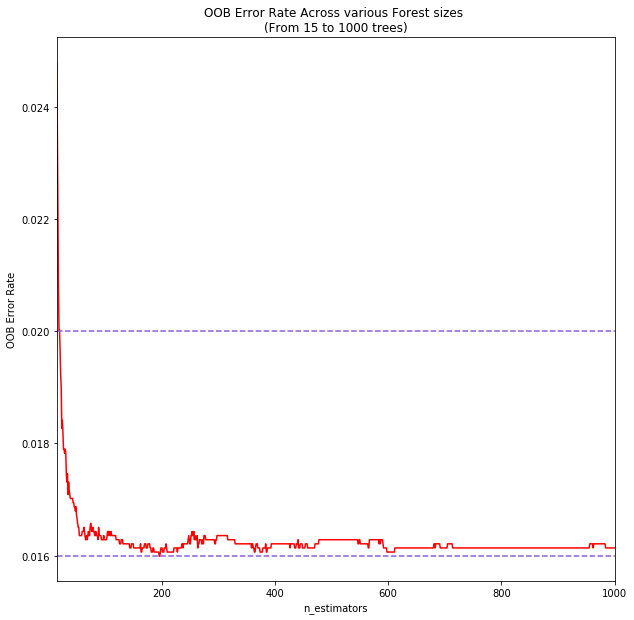

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  from ipykernel import kernelapp as app


In [232]:
fig, ax = plt.subplots(figsize=(10, 10))

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.020,
            color='#875FDB',
           linestyle='--')
plt.axhline(0.016,
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')
plt.show()
ax.set_axis_bgcolor('#fafafa')




The OOB error rate starts to oscillate at around 200 trees, so I will go ahead and use 150 trees in my forest. Using the pandas series object, I can easily find the OOB error rate for the estimator as follows:

In [233]:
print('OOB Error rate for 200 trees is: {0:.5f}'.format(oob_series[150]))

OOB Error rate for 200 trees is: 0.01621


In order for this methodology to work, we must set the number of trees calculated using the OOB error rate, and remove the warm_start and oob_score parameters, as well as include the bootstrap parameter.

In [234]:
fit_rf.set_params(n_estimators=200,
              bootstrap = True,
              warm_start=False,
              oob_score=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [235]:
# Next, let's train the algorithm with the training and target class data sets we made earlier
model_rf = fit_rf.fit(X_std_train, y_train)


In [236]:
y_rf_pred = model_rf.predict(X_test)

In [237]:
from sklearn.metrics import accuracy_score

print("RF accuracy is : {}%".format(accuracy_score(y_test, y_rf_pred)*100))

RF accuracy is : 98.38615023474179%


Accuracy score for Random forest is 98%. 

We can use Linear regresion model or Random forest as both of them have highest accuracy, 98%.

We study the taxi passengers' tipping behavior, which is a proxy for customer satisfaction or dissatisfaction toward their rides. We will show the readers that the tipping involves interesting and unusual human behavior/thinking.


Technically, the taxi data had no missing values in their '.csv' files.But the data was very dirty, which needed a lot of cleaning. The sources of the dirtiness comes from 
- Unrealistic fares, travel speed
- Negative duration or trip distance

There are two steps in this procedure. First we join the trip and fare tables on three keys that are present in all records: medallion, hack_license, and pickup_datetime. We then generate a binary classification column for "TIP".We also merge temparature and weather data together with tripfare data on hours and day time.

Then, we display the graphs for both trip and fare dataset, showing the readers that the tipping percentages display a non-trivial fluctuation throughout the hours and weekdays.

Unlike what we would have imagined naively, the passenger tipping behavior displays strong intraday ups and downs. The passengers do not routinely give out the same average percentage of tips from morning to midnight.

In both of the tip percentage heat maps, we notice that the tipping percentages depend strongly on time of the day. The passengers seem to acknowledge it is more difficult to drive in the rush hours and adjust their tipping percentages upward.

We find with surprise that the tipping percentages are strongly related to the travel speeds the passengers experience.Passengers tip more generously during the morning rush hours, evening rush hours and late into the night. We also see the spillover effect from the previous nights into the after midnight hours. This is particularly significant from Monday to Friday.

Because tip income is taxable, the taxi drivers have no incentive to punch in the numbers voluntarily if they are not recorded by the electronic system automatically. No wonder most of the tip records on cash tips are zeros.

To evaluate the performance of our model, we have partitioned the data into a training set and testing set, where the training examples are all ordered chronologically before the testing examples. This configuration mimics the task of predicting future numbers of taxi pickups using only past data. After exploring a few different error metrics to evaluate our predictions: root-mean-square-deviation(RMSD), mean absolute error, and a root-mean-square percent deviation. We considered RMSD because it favors consistency and heavily penalizes predictions with a high deviation from the true number of pickups. Prime reason to consider such accuracy is to avoid any large mistake in gauging taxi demand for a particular zone, which could be costly.‒ imagine sending 600 taxis to a zone that only truly requires 400. This misallocation results in many unutilized taxis crowded in the same place, and should be penalized more heavily than dispatching 6 taxis to a zone that only requires 4, or even dispatching 6 taxis to 100 different zones that only require 4 taxis each. RMSD efficiently avoids such scenarios and heavily penalizes such large misallocations and best represents the quality of our models’ predictions.

We conclude that viewing tips as solely a measure of service quality can be misleading. A large number of factors such as location, trip distance, trip duration and fare have a significant effect on tip. There are also some temporal effects
on tip, such as the time of day and day of week. 



| Task | Time | 
| :--- | ---: | 
| Data Retrieval |  3 hours |
| Data Preparation & Exploration |  80 hours |
| Feature Selection & Engineering |  30 hours |
| Data Modeling & Evaluation |  20 hours |
| Deriving Insight |  5 hours |